# Topics of Sociability and Solidarity in Recollections of *All* Survivors of Auschwitz-Birkenau

### Research Questions:

- If one watches testimonies of Birkenau survivors for long, what is the probability that she hears survivors speaking about solidarity and sociability? Are they frequent and recurrent elements of survivors' recollections? Or are they rare topics and survivors rather focus their attention on other topics?
- Compared to the probability of other rare or frequent events in Birkenau, are topics related to solidarity and sociability more or less probable in the narration of survivors?

## Load the relevant data

Load the libraries needed to work with the data

In [1]:
import constants
import pandas as pd
import os
from IPython.display import display
%config Completer.use_jedi = False

Set up the paths to data

In [2]:
input_directory = constants.output_data_markov_modelling

path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ constants.output_data_markov_modelling

Load the stationary probability of different topics in the recollections of survivors

In [3]:
p_complete = pd.read_csv(input_directory+'/'+'complete'+'/'+'stationary_probs.csv')

Use the line below for normalization

In [4]:
p_complete['stationary_prob_normalized'] = p_complete[p_complete.topic_name=='selections']['stationary_prob'].values[0] / p_complete['stationary_prob']

In [5]:
p_complete['stationary_prob_normalized_to_escape'] =  p_complete['stationary_prob']/p_complete[p_complete.topic_name=='escapes']['stationary_prob'].values[0]

In [6]:
p_complete['stationary_prob_normalized_to_escape'].describe()

count    640.000000
mean       2.206031
std        7.132887
min        0.000710
25%        0.093249
50%        0.312036
75%        1.212221
max       82.773644
Name: stationary_prob_normalized_to_escape, dtype: float64

In [7]:
p_complete['stationary_prob_normalized'].describe()

count       640.000000
mean       1424.411857
std        6782.426096
min           1.000000
25%          68.283735
50%         265.269121
75%         887.663235
max      116624.059295
Name: stationary_prob_normalized, dtype: float64

Show the 25 most significant topics

In [8]:
display(p_complete[0:25])

,Unnamed: 0,topic_name,stationary_prob,stationary_prob_normalized,stationary_prob_normalized_to_escape
0,0,selections,0.058627,1.000000,82.773644
1,1,intake procedures,0.052601,1.114572,74.264943
2,2,living conditions,0.046104,1.271637,65.092201
3,3,forced labor,0.041327,1.418622,58.347920
4,4,food,0.033895,1.729656,47.855561
5,5,mass murder awareness,0.031158,1.881597,43.991166
6,6,camp adaptation methods,0.024257,2.416958,34.247038
7,7,departure,0.023512,2.493475,33.196103
8,8,Appell,0.022992,2.549849,32.462171
9,9,housing conditions,0.018727,3.130665,26.439636


## Identify relevant topics

### Identify the facto significant and everyday events

Identify "selection"

In [9]:
selection = p_complete[p_complete.topic_name=='selections']['stationary_prob'].values[0]

Identify "Appell"

In [10]:
Appell = p_complete[p_complete.topic_name=='Appell']['stationary_prob'].values[0]

Identify "clothes"

In [11]:
clothes = p_complete[p_complete.topic_name=='clothing']['stationary_prob'].values[0]

Identify "tattoo"

In [12]:
tattoo = p_complete[p_complete.topic_name=='prisoner tattoos']['stationary_prob'].values[0]

### Identify the facto rare events

In [13]:
escapes = p_complete[p_complete.topic_name=='escapes']['stationary_prob'].values[0]

### Identify topics related to sociability

Identify the topic relating to social relations

In [14]:
social_bonds = p_complete[p_complete.topic_name=='social relations']['stationary_prob'].values[0]

In [15]:
friends = p_complete[p_complete.topic_name=='friends']['stationary_prob'].values[0]

### Identify topics related to acts of solidarity

In [16]:
aid_giving = p_complete[p_complete.topic_name=='aid giving']['stationary_prob'].values[0]

In [17]:
food_sharing = p_complete[p_complete.topic_name=='food sharing']['stationary_prob'].values[0]

## Observation 1

### Qualitative description:

The topic describing various forms of solidarity ("aid giving") is more probable than "tattoos"; yet is the 13th most probable topic. It is therefore part of the upper quartile that contains the most probable topics addressed by survivors.

### Quantitative evidence

In [18]:
print (aid_giving)

0.0145481802490249


In [19]:
print (selection/aid_giving)

4.029877597251535


In [20]:
display(p_complete[p_complete.topic_name=='aid giving'])

,Unnamed: 0,topic_name,stationary_prob,stationary_prob_normalized,stationary_prob_normalized_to_escape
12,12,aid giving,0.014548,4.029878,20.53999


In [21]:
print (tattoo)

0.0098821378343258


In [22]:
print (aid_giving/tattoo)

1.472169331467075


In [23]:
upper_quantile = p_complete.stationary_prob.quantile([0.75]).values[0]
print (upper_quantile)

0.0008585991117780501


In [24]:
print (aid_giving>upper_quantile)

True


## Observation 2

### Qualitative description:

The topic describing various forms of solidarity ("aid giving") is significantly more probable
(20 times) than "Escape".

### Quantitative evidence

In [25]:
print (aid_giving)

0.0145481802490249


In [26]:
print (escapes)

0.0007082856710417


In [27]:
print (aid_giving/escapes)

20.53998950399264


## Observation 3

### Qualitative description:

The topic describing various forms of social activity ("social relations") is more significant than tattoo; it is the 17th most probable topic, and it is also part of the upper quartile. It is also more probable (18 times) than escapes .

### Quantitative evidence

In [28]:
print (social_bonds)

0.0127342929856178


In [29]:
display(p_complete[0:18])

,Unnamed: 0,topic_name,stationary_prob,stationary_prob_normalized,stationary_prob_normalized_to_escape
0,0,selections,0.058627,1.000000,82.773644
1,1,intake procedures,0.052601,1.114572,74.264943
2,2,living conditions,0.046104,1.271637,65.092201
3,3,forced labor,0.041327,1.418622,58.347920
4,4,food,0.033895,1.729656,47.855561
5,5,mass murder awareness,0.031158,1.881597,43.991166
6,6,camp adaptation methods,0.024257,2.416958,34.247038
7,7,departure,0.023512,2.493475,33.196103
8,8,Appell,0.022992,2.549849,32.462171
9,9,housing conditions,0.018727,3.130665,26.439636


In [30]:
print (social_bonds/Appell)

0.5538457388037674


In [31]:
print (social_bonds/tattoo)

1.2886172201914634


In [32]:
print (selection/social_bonds)

4.603897973176593


In [33]:
print (social_bonds>upper_quantile)

True


In [34]:
print (social_bonds/escapes)

17.979035163720084


## Observation 4

### Qualitative description:

The topic describing sociability is more significant (1.5 times) than memories related to clothes. Similarly, the topic describing acts of solidarity is more significant (1.7 times) than memories related to clothes.

# Comments
## Tim
- 1.2 is a low number, it would be important to know that it's actually  significant

## Gabor
- should we just say that "topic describing sociability is slightly more probable as topic indicating memories related to clothes", ie. leave out significance?
- alternatively, someone suggested this method to resolve this problem: https://thomasleeper.com/Rcourse/Tutorials/permutationtests.html

### Quantitative evidence

In [35]:
social_bonds/clothes

1.5049900279037833

In [36]:
display(p_complete[p_complete.topic_name=="clothing"])

,Unnamed: 0,topic_name,stationary_prob,stationary_prob_normalized,stationary_prob_normalized_to_escape
25,25,clothing,0.008461,6.928821,11.946282


In [37]:
display(p_complete[p_complete.topic_name=="social bonds"])

,Unnamed: 0,topic_name,stationary_prob,stationary_prob_normalized,stationary_prob_normalized_to_escape


In [38]:
aid_giving/clothes

1.7193625294829848

## Observation 5

### Qualitative description:

The topic describing friendship is 5 times more significant than escapes. Selection is 15 times more significant than friends.

### Quantitative evidence

In [39]:
print (friends)

0.0037230619308905


In [40]:
print (friends/escapes)

5.256441126946512


In [41]:
print (selection/friends)

15.747088486465204


## Observation 6

### Qualitative description:

The topic describing friendship is 5 times more significant than escapes. Selection is 15 times more significant than friends.

### Quantitative evidence

In [42]:
print (food_sharing)

0.0037602540188387


In [43]:
print (food_sharing/escapes)

5.308951137340341


In [44]:
print (selection/food_sharing)

15.591336482216944


## Interpretation

In the recollections of survivors of Birkenau, memories related to sociability and acts of solidarity are highly probable and recurrent topics. They do recur in the narrations of many victims independently from each other. Survivors speak about them as often as about other everyday aspects and events of life in Birkenau. This suggests that neither sociability nor acts of solidarity were rare events in Birkenau. If they had been rare and sporadic, survivors would not have addressed them very often in their recollections either. They would discuss these topics as often as topics related to de facto rare events such as for instance escape. 

It is important to underline that survivors were not asked by interviewers to address solidarity and sociability. It was their decision to address these topics. The stationary probability measured above actually describe the overall probability that interviews with survivors go towards these topics.

Nevertheless this interpretation raises two questions to be addressed in the Discussion part:
- The fact that survivors recall occasions of solidarity or sociability does not indicate that they were frequent events in the past; they are just frequent in their memories
- They might recall them because they are always salient aspects of human life and not because they were frequent elements of everyday life in Birkenau


## Visualization

A word cloud rendering the stationary probability of key topics in recollections of Birkenau survivors. 

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /var/folders/xs/sj3jhyss5c54vc9k08_ghz39q764f6/T/matplotlib-0ig3r6gx because the default path (/Users/gmt28/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [46]:
p_complete = pd.read_csv(input_directory+'/'+'complete'+'/'+'stationary_probs.csv')

In [47]:
#p_complete['stationary_prob_normalized'] = 1/(p_complete[p_complete.topic_name=='living conditions']['stationary_prob'].values[0] / p_complete['stationary_prob']) 
p_complete =  p_complete[0:30].append(p_complete[p_complete.topic_name=='escapes'])
wfreqs = p_complete.set_index('topic_name')['stationary_prob'].to_dict()

In [48]:
def black(word, font_size, position, orientation,
    font_path, random_state):
    if (word =="social relations") or (word =="aid giving") or (word =="friends") or (word =="food sharing"):
        return 'red'
    elif (word =="prisoner tattoos") or (word =="clothing") or (word == "escapes"):
        return 'blue'
    else:
        return 'black'

In [49]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', color_func=black,
                min_font_size = 10).generate_from_frequencies(wfreqs)

In [50]:
wordcloud.font_path

'/miniconda3/envs/au_test/lib/python3.7/site-packages/wordcloud/DroidSansMono.ttf'

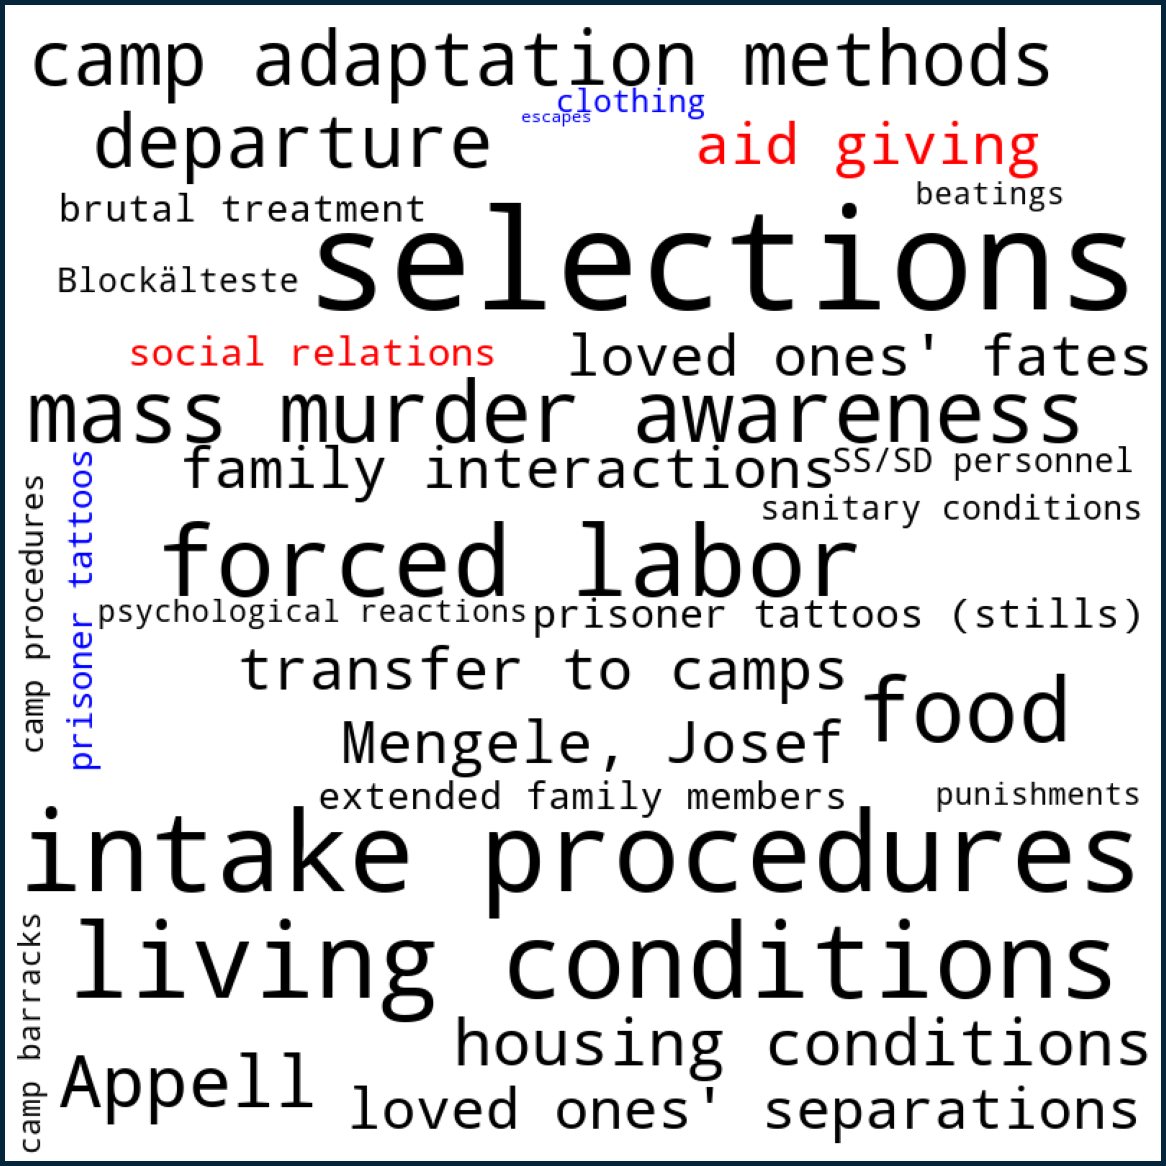

In [51]:
# plot the WordCloud image
fig, ax = plt.subplots(1, 1, figsize=(16, 16), facecolor=None,edgecolor="#04253a",linewidth=10)
ax.imshow(wordcloud)
ax.axis("off")
fig.tight_layout(pad=0)
fig.savefig("Figure_1.png",edgecolor=fig.get_edgecolor())